<a href="https://colab.research.google.com/github/J-Vinasco/mission-1/blob/main/MISI%C3%93N_UNO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# MISIÓN UNO - JULIÁN DAVID VINASCO PESCADOR
# Seleccionar un problema e identificar un objetivo
# https://github.com/davidriveraarbelaez/IA_Explorador/blob/main/Datasets/movie_metadata.csv

"""
Zootopia es una pelicula sumamente taquillera que genera grandes ingresos para las compañías.
Hay diferentes facores que garantizan el éxito como grandes directes y actores de voz.
Sin embargo, ha sucedido que películas con estas caracteristicas no han tenido el éxito esperado
tanto en taquilla como en calificación imdb

Debemos comprender los factores más importantes que determinan el éxito de una película.
Analizando qué genero de película es más exitoso y mejor reseña por el público (Calificación IMDB)

IMDB      CLASIFICACIÓN
1-3       Mala
3-6       Aceptable
6-7       Buena
7-8       Excelente
8-10      Éxitosa

"""

'\nZootopia es una pelicula sumamente taquillera que genera grandes ingresos para las compañías.\nHay diferentes facores que garantizan el éxito como grandes directes y actores de voz.\nSin embargo, ha sucedido que películas con estas caracteristicas no han tenido el éxito esperado\ntanto en taquilla como en calificación imdb\n\nDebemos comprender los factores más importantes que determinan el éxito de una película.\nAnalizando qué genero de película es más exitoso y mejor reseña por el público (Calificación IMDB)\n\nIMDB      CLASIFICACIÓN\n1-3       Mala\n3-6       Aceptable\n6-7       Buena\n7-8       Excelente\n8-10      Éxitosa\n\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
movies = pd.read_csv('/content/movie_metadata.csv')
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0$,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0$,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0$,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0$,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,0.0$,NaN,12.0,7.1,NaN,0


In [4]:
movies.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [5]:
# Hay datos nulos
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [6]:
movies.shape

(5043, 28)

In [7]:
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [8]:
#  Filtrar solo algún director
filtro = (movies["director_name"] == "James Gunn") | (movies["director_name"] == "Rich Moore")
movies[filtro].iloc[:,:15] # Tamaño de fila igual a : "por defecto", tamaño de columna igual a :15


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name
90,Color,Rich Moore,377.0,101.0,66.0,833.0,Sarah Silverman,975.0,189412677.0,Adventure|Animation|Comedy|Family|Sci-Fi,Jack McBrayer,Wreck-It Ralph,272534,4451,Joe Lo Truglio
95,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,Bradley Cooper,Guardians of the Galaxy,682155,32438,Djimon Hounsou
2599,Color,James Gunn,251.0,95.0,571.0,102.0,Gregg Henry,499.0,7774730.0,Comedy|Horror|Sci-Fi,Dustin Milligan,Slither,61912,1120,Tania Saulnier
4208,Color,James Gunn,238.0,96.0,571.0,370.0,Rainn Wilson,2000.0,322157.0,Comedy|Crime|Drama,Linda Cardellini,Super,61787,4590,Paul T. Taylor


In [9]:
# Verificar valores nulos
falt = movies.isnull().sum()
print("Hay",falt.sum(),"valores nulos")
falt

Hay 2208 valores nulos


,0
color,19
director_name,104
num_critic_for_reviews,50
duration,15
director_facebook_likes,104
actor_3_facebook_likes,23
actor_2_name,13
actor_1_facebook_likes,7
gross,884
genres,0


In [10]:
#Analizar qué tipo de valor tienen las columnas
numerical_cols = [col for col in movies.columns if movies[col].dtype != 'object']
categorical_cols = [col for col in movies.columns if movies[col].dtype == 'object']
numerical_cols, categorical_cols

movies[numerical_cols].describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [11]:
# Lista de valores en la columna color
movies['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [12]:
# DUPLICADOS

pelidupli = movies.duplicated().sum()
print("Se encontraron", pelidupli, "registros duplicados")

# ELIMINAR DUPLICADOS
movies.drop_duplicates(inplace=True)

Se encontraron 45 registros duplicados


In [13]:
# En esta linea dice que le asigne un valor a las celdas que se encuentran vacías del comando anterior (color)

colormode = movies['color'].mode().iloc[0]
movies.loc[:,'color'] = movies['color'].fillna(colormode)
movies.color.isnull().sum()


0

In [14]:
movies.director_name.nunique(), movies.director_name.isnull().sum()
# Muestra los valores únicos de director y después los vacíos

(2398, 103)

In [15]:
movies = movies.dropna(axis=0, subset=['director_name'])
# Elimino los nulos
movies.shape

(4895, 28)

In [16]:
# Mirar el valor minimo y máximo de una fila
movies.num_critic_for_reviews.min(), movies.num_critic_for_reviews.max()

(1.0, 813.0)

In [17]:
# Calcular valores
movies.num_critic_for_reviews.median(), movies.num_critic_for_reviews.mean()

(112.0, 142.2358276643991)

In [18]:
# Añadir un valor de media a las reviews que se encuentren vacías
mean_reviews = movies['num_critic_for_reviews'].mean()
movies.loc[:,'num_critic_for_reviews'] = movies['num_critic_for_reviews'].fillna(mean_reviews)
movies.num_critic_for_reviews.isnull().sum()

0

In [19]:
# Eliminar las filas que tengan algún valor nulo
movies = movies.dropna()

In [20]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3941 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3941 non-null   object 
 1   director_name              3941 non-null   object 
 2   num_critic_for_reviews     3941 non-null   float64
 3   duration                   3941 non-null   float64
 4   director_facebook_likes    3941 non-null   float64
 5   actor_3_facebook_likes     3941 non-null   float64
 6   actor_2_name               3941 non-null   object 
 7   actor_1_facebook_likes     3941 non-null   float64
 8   gross                      3941 non-null   float64
 9   genres                     3941 non-null   object 
 10  actor_1_name               3941 non-null   object 
 11  movie_title                3941 non-null   object 
 12  num_voted_users            3941 non-null   int64  
 13  cast_total_facebook_likes  3941 non-null   int64  
 1

In [21]:
movies.num_critic_for_reviews.head()

,num_critic_for_reviews
0,723.0
1,302.0
2,602.0
3,813.0
5,462.0


In [22]:
#  Renombrar columnas

movies = movies.rename(columns={'director_name':'Director', "num_critic_for_reviews":"Reviews",'director_facebook_likes':'Likes',
                                'actor_3_facebook_likes': 'Actor3 Likes','actor_1_facebook_likes':'Actor1 Likes',
                                'actor_2_name' : 'Actor 2', 'title_year':'year','imdb_score':'IMDB'})
movies

,color,Director,Reviews,duration,Likes,Actor3 Likes,Actor 2,Actor1 Likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,year,actor_2_facebook_likes,IMDB,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0$,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0$,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0$,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0$,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0$,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,...,39.0,French,France,R,4500.0$,2004.0,133.0,6.9,2.35,171
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,...,26.0,Persian,Iran,Not Rated,10000.0$,2000.0,0.0,7.5,1.85,697
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0$,2004.0,45.0,7.0,1.85,19000
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0$,1992.0,20.0,6.9,1.37,0


In [23]:
# Mostrar por puntación en IMDB

columnas = ['color','Director','movie_title','IMDB'] + [col for col in movies.columns if col not in ['color', 'Director', 'movie_title', 'IMDB']]
movies = movies[columnas]
movies = movies.sort_values(by='IMDB', ascending=False)
movies


,color,Director,movie_title,IMDB,Reviews,duration,Likes,Actor3 Likes,Actor 2,Actor1 Likes,...,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
1937,Color,Frank Darabont,The Shawshank Redemption,9.3,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,...,http://www.imdb.com/title/tt0111161/?ref_=fn_t...,4144.0,English,USA,R,25000000.0$,1994.0,745.0,1.85,108000
3466,Color,Francis Ford Coppola,The Godfather,9.2,208.0,175.0,0.0,3000.0,Marlon Brando,14000.0,...,http://www.imdb.com/title/tt0068646/?ref_=fn_t...,2238.0,English,USA,R,6000000.0$,1972.0,10000.0,1.85,43000
66,Color,Christopher Nolan,The Dark Knight,9.0,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,...,http://www.imdb.com/title/tt0468569/?ref_=fn_t...,4667.0,English,USA,PG-13,185000000.0$,2008.0,13000.0,2.35,37000
2837,Color,Francis Ford Coppola,The Godfather: Part II,9.0,149.0,220.0,0.0,3000.0,Al Pacino,22000.0,...,http://www.imdb.com/title/tt0071562/?ref_=fn_t...,650.0,English,USA,R,13000000.0$,1974.0,14000.0,1.85,14000
4498,Color,Sergio Leone,"The Good, the Bad and the Ugly",8.9,181.0,142.0,0.0,24.0,Luigi Pistilli,16000.0,...,http://www.imdb.com/title/tt0060196/?ref_=fn_t...,780.0,Italian,Italy,Approved,1200000.0$,1966.0,34.0,2.35,20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,Color,Robert Iscove,From Justin to Kelly,2.1,60.0,90.0,7.0,251.0,Kelly Clarkson,525.0,...,http://www.imdb.com/title/tt0339034/?ref_=fn_t...,304.0,English,USA,PG,12000000.0$,2003.0,281.0,1.85,0
3505,Color,Don Michael Paul,Who's Your Caddy?,2.0,25.0,93.0,70.0,442.0,Faizon Love,692.0,...,http://www.imdb.com/title/tt0785077/?ref_=fn_t...,46.0,English,USA,PG-13,7000000.0$,2007.0,585.0,1.85,446
2295,Color,Bob Clark,Superbabies: Baby Geniuses 2,1.9,32.0,88.0,84.0,177.0,Vanessa Angel,650.0,...,http://www.imdb.com/title/tt0270846/?ref_=fn_t...,129.0,English,Germany,PG,20000000.0$,2004.0,384.0,2.35,0
2268,Color,Jason Friedberg,Disaster Movie,1.9,111.0,88.0,82.0,329.0,Tony Cox,869.0,...,http://www.imdb.com/title/tt1213644/?ref_=fn_t...,359.0,English,USA,PG-13,25000000.0$,2008.0,624.0,1.85,0


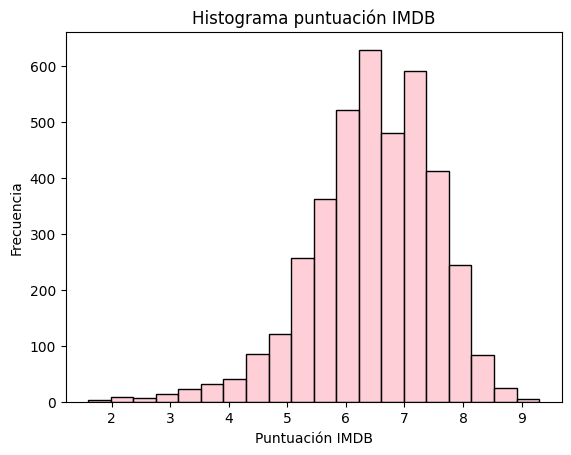

In [24]:
# Crear un histograma de la puntuación IMDB

sns.histplot(movies['IMDB'], bins=20,color = 'pink')
plt.title('Histograma puntuación IMDB')
plt.xlabel('Puntuación IMDB')
plt.ylabel('Frecuencia')
plt.show()

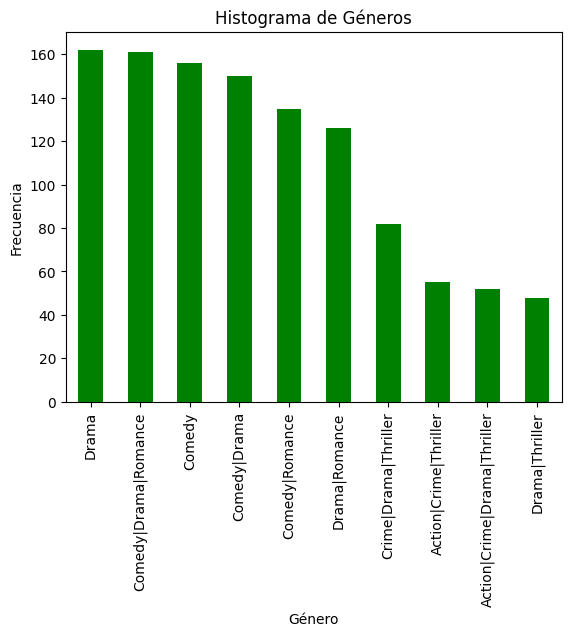

In [25]:
movies['genres'].value_counts().head(10).plot(kind = 'bar',color = 'green')
plt.title('Histograma de Géneros')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

In [26]:
# Revisar qué tipo de dato tienen las columnas budget, gross y IMDB para analizar la correlación

print(movies[['budget','gross','IMDB']].dtypes)
print()

# Cambiar el tipo de dato de budget a float
movies['budget'] = movies['budget'].str.replace('$', '').str.replace(',', '').astype(float)

budget     object
gross     float64
IMDB      float64
dtype: object



In [27]:
# Correlación sobre budget, gross y IMDB

correlacion = movies[['budget','gross','IMDB']].corr()
correlacion


,budget,gross,IMDB
budget,1.000000,0.103323,0.027389
gross,0.103323,1.000000,0.202856
IMDB,0.027389,0.202856,1.000000


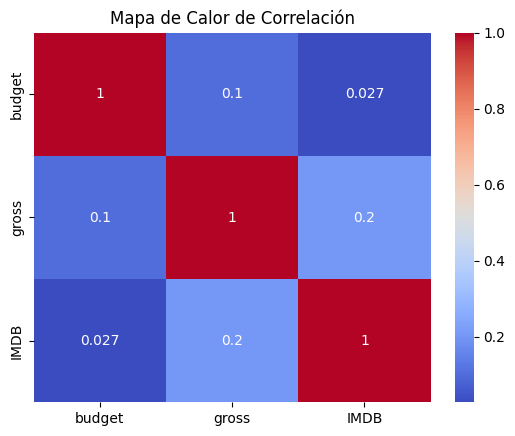

In [28]:
# Mapa de calor sobre esta correlación

sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

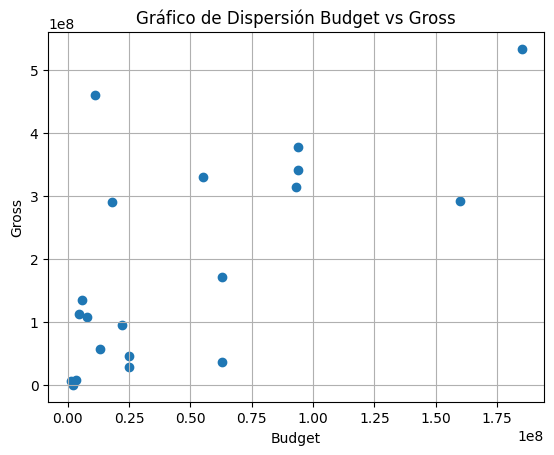

In [29]:
# Crea un gráfico de dispersión para analizar la relación entre budget y gross.

plt.scatter(movies['budget'].head(20), movies['gross'].head(20))
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.grid(True)
plt.title('Gráfico de Dispersión Budget vs Gross')
plt.show()

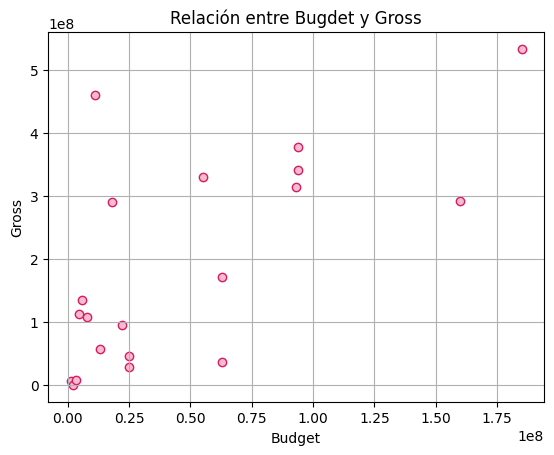

In [30]:
# Crea un gráfico de dispersión para analizar la relación entre budget y gross.
plt.scatter(movies['budget'].head(20), movies['gross'].head(20), color ='#f8bbd0', edgecolor = '#d81b60')
plt.title('Relación entre Bugdet y Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.grid(True)
plt.show()

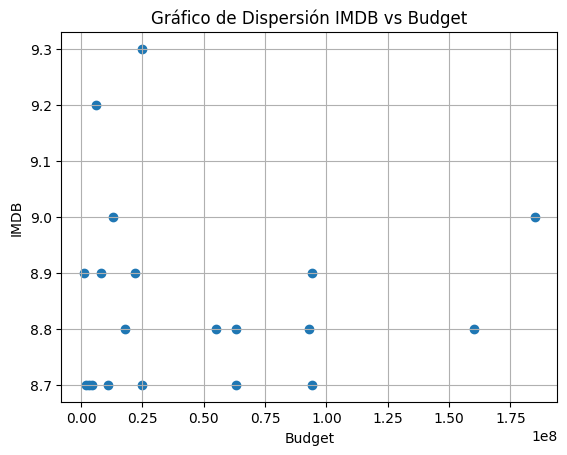

In [31]:
# Haz un gráfico de dispersión entre imdb_score y budget

plt.scatter(movies['budget'].head(20),movies['IMDB'].head(20))
plt.ylabel('IMDB')
plt.xlabel('Budget')
plt.grid(True)
plt.title('Gráfico de Dispersión IMDB vs Budget')
plt.show()

In [32]:
# Descargar un nuevo archivo
movies.to_csv('new_movies_data.csv', index=False)

In [33]:
movies2 = pd.read_csv('/content/new_movies_data.csv')
movies2.describe()

,IMDB,Reviews,duration,Likes,Actor3 Likes,Actor1 Likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
count,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3.941000e+03,3.941000e+03,3941.000000,3941.000000,3941.000000,3.941000e+03,3941.000000,3941.000000,3941.000000,3941.000000
mean,6.473205,164.193098,109.891398,780.787871,740.151992,7557.403197,5.029624e+07,1.012469e+05,11196.498858,1.367927,323.755392,4.367371e+07,2003.118498,1941.863994,2.107326,8966.705151
std,1.045499,121.806537,22.361483,3016.869319,1820.439291,15292.222226,6.866469e+07,1.485649e+05,18765.592155,2.029635,403.491163,2.208362e+08,9.875027,4433.306537,0.350758,20995.921694
min,1.600000,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,3.000000,0.000000e+00,1927.000000,0.000000,1.180000,0.000000
25%,5.900000,76.000000,95.000000,11.000000,183.000000,731.000000,6.754898e+06,1.779000e+04,1836.000000,0.000000,102.000000,8.000000e+06,1999.000000,368.000000,1.850000,0.000000
50%,6.600000,135.000000,106.000000,61.000000,428.000000,1000.000000,2.733803e+07,5.004100e+04,3905.000000,1.000000,200.000000,2.200000e+07,2005.000000,664.000000,2.350000,204.000000
75%,7.200000,221.000000,120.000000,232.000000,683.000000,12000.000000,6.468536e+07,1.202020e+05,15912.000000,2.000000,384.000000,5.000000e+07,2010.000000,969.000000,2.350000,11000.000000
max,9.300000,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,16.000000,349000.000000


In [34]:
movies2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3941 non-null   object 
 1   Director                   3941 non-null   object 
 2   movie_title                3941 non-null   object 
 3   IMDB                       3941 non-null   float64
 4   Reviews                    3941 non-null   float64
 5   duration                   3941 non-null   float64
 6   Likes                      3941 non-null   float64
 7   Actor3 Likes               3941 non-null   float64
 8   Actor 2                    3941 non-null   object 
 9   Actor1 Likes               3941 non-null   float64
 10  gross                      3941 non-null   float64
 11  genres                     3941 non-null   object 
 12  actor_1_name               3941 non-null   object 
 13  num_voted_users            3941 non-null   int64